In [137]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [138]:
# Reading the data

In [139]:
os.chdir("D:/DATA SCIENCE/PYTHON")

In [140]:
X = pd.read_excel("Absenteeism_at_work_Project.xls")

In [141]:
# Missing Value Analysis

In [142]:
Y = pd.DataFrame(X.isnull().sum())

In [143]:
Y = Y.reset_index()

In [144]:
Y = Y.rename(columns = {'index':'Variables' , 0 : 'Miss_Percent'})

In [145]:
Y['Miss_Percent'] = (Y['Miss_Percent']/len(X)) * 100

In [146]:
Y = Y.sort_values('Miss_Percent' , ascending = False )

In [19]:
# X['Body mass index'].loc[120] = 24
# X['Body mass index'].loc[120] = 26.68 - Mean
# X['Body mass index'].loc[120] = 25 - Median
# X['Body mass index'].loc[120] = 24 - KNN

In [9]:
#Y

,Variables,Miss_Percent
19,Body mass index,4.189189
20,Absenteeism time in hours,2.972973
18,Height,1.891892
9,Work load Average/day,1.351351
12,Education,1.351351
5,Transportation expense,0.945946
13,Son,0.810811
11,Disciplinary failure,0.810811
10,Hit target,0.810811
15,Social smoker,0.540541


In [10]:
# X['Body mass index'] = X['Body mass index'].fillna(X['Body mass index'].mean())

In [11]:
# X['Body mass index'] = X['Body mass index'].fillna(X['Body mass index'].median())

In [ ]:
# Data type conversion

In [147]:
cnames1 = ["Reason for absence" , "Month of absence" , "Day of the week" , "Seasons" , "Disciplinary failure" ,
         "Education" , "Social drinker" , "Social smoker"]

In [148]:
X['Reason for absence'] = pd.Categorical(X['Reason for absence'])
X['Month of absence'] = pd.Categorical(X['Month of absence'])
X['Day of the week'] = pd.Categorical(X['Day of the week'])
X['Seasons'] = pd.Categorical(X['Seasons'])
X['Disciplinary failure'] = pd.Categorical(X['Disciplinary failure'])
X['Education'] = pd.Categorical(X['Education'])
X['Social drinker'] = pd.Categorical(X['Social drinker'])
X['Social smoker'] = pd.Categorical(X['Social smoker'])

In [23]:
#X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 737 non-null category
Month of absence                   739 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             733 non-null float64
Distance from Residence to Work    737 non-null float64
Service time                       737 non-null float64
Age                                737 non-null float64
Work load Average/day              730 non-null float64
Hit target                         734 non-null float64
Disciplinary failure               734 non-null category
Education                          730 non-null category
Son                                734 non-null float64
Social drinker                     737 non-null category
Social smoker                      736 non-null ca

In [ ]:
# Missing Value Analysis

In [149]:
X.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [150]:
X = pd.DataFrame(KNN(k=5).complete(X) , columns = X.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.218
Imputing row 101/740 with 1 missing, elapsed time: 0.221
Imputing row 201/740 with 0 missing, elapsed time: 0.224
Imputing row 301/740 with 0 missing, elapsed time: 0.225
Imputing row 401/740 with 0 missing, elapsed time: 0.226
Imputing row 501/740 with 0 missing, elapsed time: 0.227
Imputing row 601/740 with 0 missing, elapsed time: 0.228
Imputing row 701/740 with 0 missing, elapsed time: 0.229


In [151]:
X.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [ ]:
# Outlier Analysis

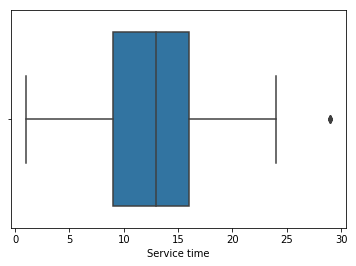

In [73]:
sns.boxplot(X['Service time'])

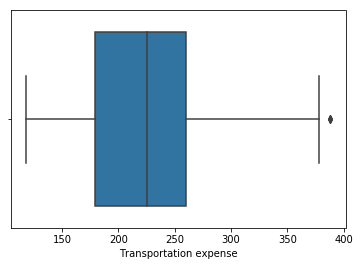

In [74]:
sns.boxplot(X['Transportation expense'])

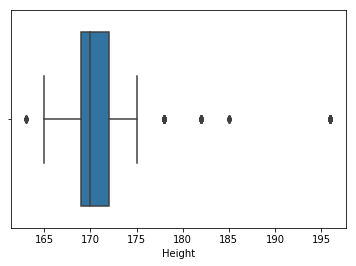

In [75]:
sns.boxplot(X['Height'])

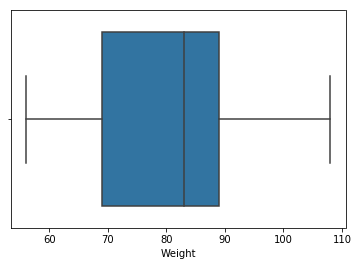

In [30]:
sns.boxplot(X['Weight'])

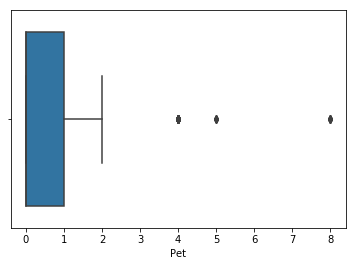

In [76]:
sns.boxplot(X['Pet'])

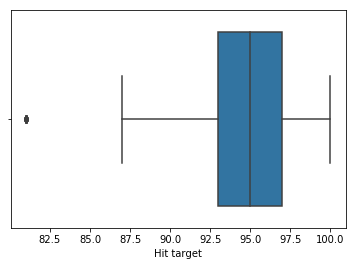

In [32]:
sns.boxplot(X['Hit target'])

{'boxes': [<matplotlib.lines.Line2D at 0x1b6e0940>],
 'caps': [<matplotlib.lines.Line2D at 0x1b6ea358>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b6eafd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b6eaba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b6e0a90>,
  <matplotlib.lines.Line2D at 0x1b6e0ef0>]}

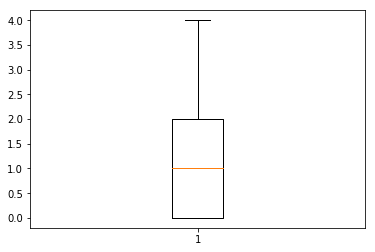

In [33]:
plt.boxplot(X['Son'])

{'boxes': [<matplotlib.lines.Line2D at 0x1b74cb70>],
 'caps': [<matplotlib.lines.Line2D at 0x1b754588>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b75b240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b754dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b74ccc0>,
  <matplotlib.lines.Line2D at 0x1b754160>]}

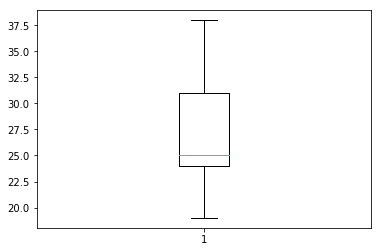

In [34]:
plt.boxplot(X["Body mass index"])

{'boxes': [<matplotlib.lines.Line2D at 0x1b7b38d0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b7bc2e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b7bcf60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b7bcb38>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b7b3a20>,
  <matplotlib.lines.Line2D at 0x1b7b3e80>]}

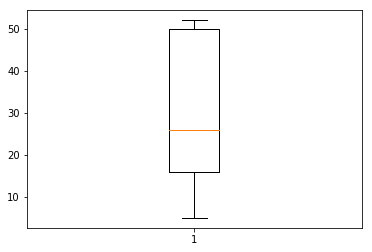

In [35]:
plt.boxplot(X['Distance from Residence to Work'])

{'boxes': [<matplotlib.lines.Line2D at 0x1b8117f0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b81a208>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b81ae80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b81aa58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b811940>,
  <matplotlib.lines.Line2D at 0x1b811da0>]}

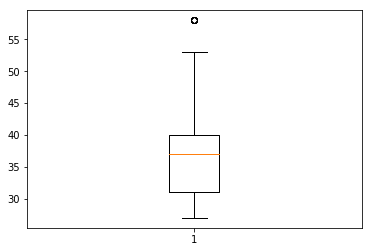

In [36]:
plt.boxplot(X['Age'])

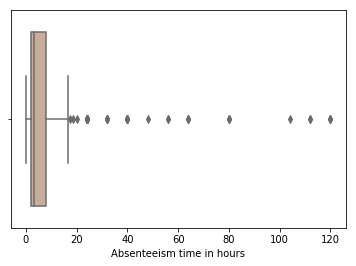

In [37]:
sns.boxplot(X['Absenteeism time in hours'] , palette="pink")

In [152]:
cnames = ["Transportation expense" , "Distance from Residence to Work" , "Service time" , "Age" ,"Hit target" , 
          "Son" , "Pet" , "Weight" , "Height" , "Body mass index" , "Absenteeism time in hours"]

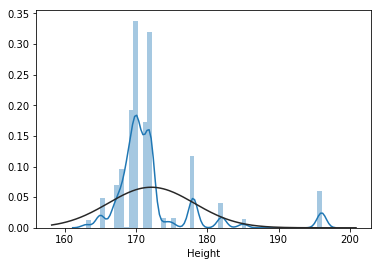

In [153]:
# Looking for normality


from scipy.stats import norm
from scipy import stats
sns.distplot(X['Height'],fit=norm);
fig = plt.figure()

In [154]:
missing = pd.DataFrame(X.isnull().sum())

In [41]:
#missing

,0
ID,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0


In [42]:
#X.shape

(740, 21)

In [ ]:
# Outlier Analysis

In [155]:
q75, q25 = np.percentile(X['Transportation expense'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['Transportation expense'] < minimum,:'Transportation expense'] = np.nan
X.loc[X['Transportation expense'] > maximum,:'Transportation expense'] = np.nan

In [156]:
q75, q25 = np.percentile(X['Pet'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

X.loc[X['Pet'] < min ,: 'Pet'] = np.nan
X.loc[X['Pet'] > max ,: 'Pet'] = np.nan

In [157]:
q75, q25 = np.percentile(X['Height'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

X.loc[X['Height'] < min ,: 'Height'] = np.nan
X.loc[X['Height'] > max ,: 'Height'] = np.nan

In [158]:
q75, q25 = np.percentile(X['Hit target'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

X.loc[X['Hit target'] < min ,: 'Hit target'] = np.nan
X.loc[X['Hit target'] > max ,: 'Hit target'] = np.nan

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [159]:
q75, q25 = np.percentile(X['Service time'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

X.loc[X['Service time'] < min ,: 'Service time'] = np.nan
X.loc[X['Service time'] > max ,: 'Service time'] = np.nan

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [160]:
q75, q25 = np.percentile(X['Age'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

X.loc[X['Age'] < min ,: 'Age'] = np.nan
X.loc[X['Age'] > max ,: 'Age'] = np.nan

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [161]:
q75, q25 = np.percentile(X['Absenteeism time in hours'], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

X.loc[X['Absenteeism time in hours'] < min ,: 'Absenteeism time in hours'] = np.nan
X.loc[X['Absenteeism time in hours'] > max ,: 'Absenteeism time in hours'] = np.nan

In [162]:
missing_val = pd.DataFrame(X.isnull().sum())

In [51]:
#missing_val

,0
ID,184
Reason for absence,184
Month of absence,184
Day of the week,184
Seasons,184
Transportation expense,184
Distance from Residence to Work,184
Service time,184
Age,184
Work load Average/day,184


In [163]:
X = pd.DataFrame(KNN(k=3).complete(X) , columns = X.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.258
Imputing row 101/740 with 19 missing, elapsed time: 0.269
Imputing row 201/740 with 17 missing, elapsed time: 0.281
Imputing row 301/740 with 0 missing, elapsed time: 0.301
Imputing row 401/740 with 0 missing, elapsed time: 0.312
Imputing row 501/740 with 0 missing, elapsed time: 0.324
Imputing row 601/740 with 0 missing, elapsed time: 0.332
Imputing row 701/740 with 0 missing, elapsed time: 0.347
[KNN] Warning: 966/15540 still missing after imputation, replacing with 0


In [118]:
X['Reason for absence'] = pd.Categorical(X['Reason for absence'])
X['Month of absence'] = pd.Categorical(X['Month of absence'])
X['Day of the week'] = pd.Categorical(X['Day of the week'])
X['Seasons'] = pd.Categorical(X['Seasons'])
X['Disciplinary failure'] = pd.Categorical(X['Disciplinary failure'])
X['Education'] = pd.Categorical(X['Education'])
X['Social drinker'] = pd.Categorical(X['Social drinker'])
X['Social smoker'] = pd.Categorical(X['Social smoker'])

In [55]:
#X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null float64
Reason for absence                 740 non-null category
Month of absence                   740 non-null category
Day of the week                    740 non-null category
Seasons                            740 non-null category
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null category
Education                          740 non-null category
Son                                740 non-null float64
Social drinker                     740 non-null category
Social smoker                      740 non-null 

In [ ]:
# Feature selection

In [164]:
df_corr = X.loc[:,cnames]

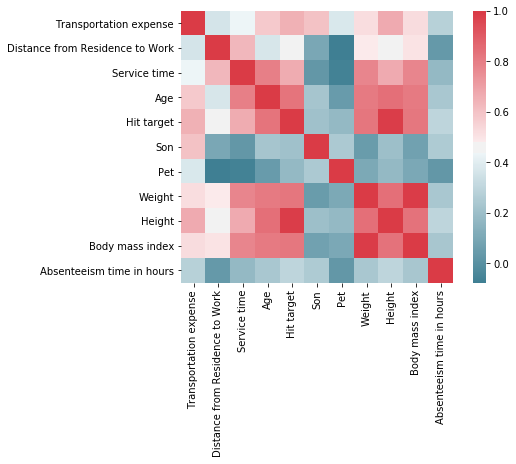

In [165]:
f , ax = plt.subplots(figsize = (7,5))

corr = df_corr.corr()

sns.heatmap(corr , mask = np.zeros_like(corr , dtype = np.bool) , cmap = sns.diverging_palette(220 , 10 , as_cmap = True),
          square = True , ax = ax)

In [41]:
#secondary = X.copy()
#X = secondary.copy()

In [ ]:
# Model Preparation and Evaluation

In [ ]:
# Decision Tree Regression

In [166]:
train , test = train_test_split(X , test_size = 0.2)

In [167]:
fit = DecisionTreeRegressor(max_depth=3).fit(train.iloc[:,0:20] , train.iloc[:,20])

In [168]:
predictions_DT = fit.predict(test.iloc[:,0:20])

In [124]:
#predictions_DT

array([2.74758411, 7.72801827, 0.        , 2.74758411, 5.45249319,
       0.        , 5.0308499 , 2.74758411, 2.74758411, 2.74758411,
       0.        , 2.74758411, 7.72801827, 2.74758411, 7.72801827,
       2.74758411, 0.        , 5.45249319, 2.74758411, 2.74758411,
       2.74758411, 7.72801827, 5.0308499 , 5.0308499 , 5.0308499 ,
       5.0308499 , 5.45249319, 0.        , 5.0308499 , 5.45249319,
       2.74758411, 5.0308499 , 5.0308499 , 2.74758411, 7.72801827,
       5.45249319, 7.72801827, 7.72801827, 2.74758411, 5.45249319,
       7.72801827, 5.0308499 , 2.74758411, 0.        , 2.74758411,
       0.        , 2.74758411, 2.74758411, 2.74758411, 5.45249319,
       0.        , 2.74758411, 2.74758411, 2.74758411, 5.0308499 ,
       5.45249319, 2.74758411, 2.74758411, 7.72801827, 2.74758411,
       0.        , 2.74758411, 0.        , 2.74758411, 0.        ,
       2.74758411, 2.74758411, 2.74758411, 5.45249319, 2.74758411,
       5.45249319, 0.        , 5.45249319, 7.72801827, 5.45249

In [169]:
mse = mean_squared_error(test.iloc[:,20], predictions)


rmse = sqrt(mean_squared_error(test.iloc[:,20], predictions))


mae  = mean_absolute_error(test.iloc[:,20],predictions)

In [170]:
mse , rmse , mae

(16.376201242054886, 4.0467519373016785, 3.303273590640326)

In [29]:
#def MAPE(y_true , y_pred) :
#    mape = np.mean(np.abs((y_true - y_pred) / y_true))
#    return mape

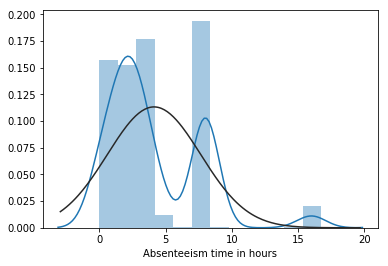

In [172]:
from scipy.stats import norm
sns.distplot(train['Absenteeism time in hours'],fit=norm);
fig = plt.figure()

In [ ]:
# Random Forest Regression 

In [173]:
A = X.values[:,0:20]
B = X.values[:,20]

A_train , A_test , B_train , B_test = train_test_split(A,B,test_size = 0.2)

In [174]:
RF_model = RandomForestRegressor(n_estimators = 500).fit(A_train , B_train)

In [175]:
RF_pred = RF_model.predict(A_test)

In [131]:
#RF_pred

array([ 4.87548319,  2.05879992,  5.27757003,  5.35776682,  2.22793334,
        2.96200003,  6.56830775,  2.828     ,  7.61477051,  1.79191033,
        3.4853    ,  3.22274366,  3.36344432,  4.93741214,  1.26163334,
        2.52061473,  6.82489853,  3.14534366, 15.61      ,  6.57866285,
        2.14309548,  2.48133333,  7.512     ,  3.00331033,  5.67269177,
        4.18332321,  6.80826257,  7.55089853,  7.4835189 ,  3.15744863,
        2.89286673,  5.84560363,  3.07523333,  7.9226419 ,  3.258     ,
        2.66014108,  7.952     ,  3.37138819,  0.        ,  7.794     ,
        7.60178872,  5.44962988,  4.05003492,  4.062     ,  2.17195556,
        3.97693334,  2.14309548,  0.        ,  3.93000001,  4.45921028,
        7.256     ,  7.69934154,  0.        ,  2.73608709,  6.71166667,
        5.98933333,  2.61419296,  8.65522103,  7.02709735,  2.42326197,
        4.92796545,  2.85916667,  3.40226667,  7.97624384,  2.3751    ,
        3.06711249,  0.        ,  5.99966667,  2.90015   ,  8.52

In [176]:
mse = mean_squared_error(test.iloc[:,20], RF_pred)


rmse = sqrt(mean_squared_error(test.iloc[:,20], RF_pred))


mae = mean_absolute_error(test.iloc[:,20],RF_pred)

In [177]:
mse , rmse , mae

(18.96661373650561, 4.355067592644873, 3.533779768423863)

In [ ]:
# Linear Regression

In [178]:
import statsmodels.api as sm

model  = sm.OLS(train.iloc[:,20] , train.iloc[:,0:20]).fit()

In [179]:
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism time in hours   R-squared:                       0.744
Model:                                   OLS   Adj. R-squared:                  0.736
Method:                        Least Squares   F-statistic:                     83.31
Date:                       Tue, 28 Aug 2018   Prob (F-statistic):          1.02e-154
Time:                               00:11:18   Log-Likelihood:                -1436.8
No. Observations:                        592   AIC:                             2914.
Df Residuals:                            572   BIC:                             3001.
Df Model:                                 20                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ID                                 -0.0567      0.021     -2.708      0.007      -0.098      -0.016
Reason for absence                 -0.1651      0.019     -8.794      0.000      -0.202      -0.128
Month of absence                    0.0688      0.049      1.392      0.165      -0.028       0.166
Day of the week                    -0.2205      0.094     -2.334      0.020      -0.406      -0.035
Seasons                            -0.2909      0.137     -2.131      0.034      -0.559      -0.023
Transportation expense             -0.0109      0.005     -2.246      0.025      -0.020      -0.001
Distance from Residence to Work    -0.1128      0.017     -6.725      0.000      -0.146      -0.080
Service time                        0.2730      0.079      3.475      0.001       0.119       0.427
Age                                -0.1771      0.033     -5.357      0.000      -0.242      -0.112
Work load Average/day            1.281e-05    3.9e-06      3.287      0.001    5.16e-06    2.05e-05
Hit target                          0.0071      0.041      0.171      0.864      -0.074       0.088
Disciplinary failure               -8.4419      0.792    -10.661      0.000      -9.997      -6.887
Education                          -0.3925      0.350     -1.122      0.262      -1.080       0.295
Son                                 1.1776      0.165      7.141      0.000       0.854       1.502
Social drinker                      1.3647      0.764      1.786      0.075      -0.136       2.865
Social smoker                      -2.9003      0.772     -3.758      0.000      -4.416      -1.385
Pet                                -0.2428      0.319     -0.761      0.447      -0.869       0.384
Weight                             -0.1813      0.067     -2.722      0.007      -0.312      -0.050
Height                              0.0866      0.029      3.003      0.003       0.030       0.143
Body mass index                     0.4871      0.178      2.730      0.007       0.137       0.838
==============================================================================
Omnibus:                      163.061   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.457
Skew:                           1.309   Prob(JB):                    1.29e-109
Kurtosis:                       6.671   Cond. No.                     2.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical probl

In [180]:
pred_lr = model.predict(test.iloc[:,0:20])

In [181]:
mse = mean_squared_error(test.iloc[:,20], pred_lr)


rmse = sqrt(mean_squared_error(test.iloc[:,20], pred_lr))


mae = mean_absolute_error(test.iloc[:,20],pred_lr )

In [182]:
mse , rmse , mae

(8.880577196701386, 2.9800297308418564, 2.1387518736687205)